# 十分钟上手 Pandas

`pandas` 是一个 `Python Data Analysis Library`。

安装请参考官网的教程，如果安装了 `Anaconda`，则不需要安装 `pandas` 库。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 产生 Pandas 对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series

一维 `Series` 可以用一维列表初始化：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

print s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64


默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [3]:
dates = pd.date_range('20130101', periods=6)

print dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个 `DataFrame` 结构：

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

A         B         C         D
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-05  0.038232  0.875057 -0.092526  0.934432
2013-01-06 -2.163453 -0.010279  1.699886  1.291653

默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

A          B  C  D      E    F
0  1 2013-01-02  1  3   test  foo
1  1 2013-01-02  1  3  train  foo
2  1 2013-01-02  1  3   test  foo
3  1 2013-01-02  1  3  train  foo

字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [7]:
df.head()

A         B         C         D
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-05  0.038232  0.875057 -0.092526  0.934432

最后 3 行：

In [8]:
df.tail(3)

A         B         C         D
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-05  0.038232  0.875057 -0.092526  0.934432
2013-01-06 -2.163453 -0.010279  1.699886  1.291653

### 下标，列标，数据

下标使用 `index` 属性查看：

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [10]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

数据值使用 `values` 查看：

In [11]:
df.values

array([[-0.60593585, -0.86165752, -1.00192387,  1.52858443],
       [-0.16540784,  0.38833783,  1.18718697,  1.81981793],
       [ 0.06525454, -1.60807414, -1.2823306 , -0.28606716],
       [ 1.28930486,  0.49711531, -0.22535143,  0.04023897],
       [ 0.03823179,  0.87505664, -0.0925258 ,  0.93443212],
       [-2.16345271, -0.01027865,  1.69988608,  1.29165337]])

### 统计数据

查看简单的统计数据：

In [12]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.257001 -0.119917  0.047490  0.888110
std    1.126657  0.938705  1.182629  0.841529
min   -2.163453 -1.608074 -1.282331 -0.286067
25%   -0.495804 -0.648813 -0.807781  0.263787
50%   -0.063588  0.189030 -0.158939  1.113043
75%    0.058499  0.469921  0.867259  1.469352
max    1.289305  0.875057  1.699886  1.819818

### 转置

In [13]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.605936   -0.165408    0.065255    1.289305    0.038232   -2.163453
B   -0.861658    0.388338   -1.608074    0.497115    0.875057   -0.010279
C   -1.001924    1.187187   -1.282331   -0.225351   -0.092526    1.699886
D    1.528584    1.819818   -0.286067    0.040239    0.934432    1.291653

## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [14]:
df.sort_index(ascending=False)

A         B         C         D
2013-01-06 -2.163453 -0.010279  1.699886  1.291653
2013-01-05  0.038232  0.875057 -0.092526  0.934432
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584

In [15]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01  1.528584 -1.001924 -0.861658 -0.605936
2013-01-02  1.819818  1.187187  0.388338 -0.165408
2013-01-03 -0.286067 -1.282331 -1.608074  0.065255
2013-01-04  0.040239 -0.225351  0.497115  1.289305
2013-01-05  0.934432 -0.092526  0.875057  0.038232
2013-01-06  1.291653  1.699886 -0.010279 -2.163453

`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [16]:
df.sort_values(by="B")

A         B         C         D
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584
2013-01-06 -2.163453 -0.010279  1.699886  1.291653
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-05  0.038232  0.875057 -0.092526  0.934432

## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [17]:
df["A"]

2013-01-01   -0.605936
2013-01-02   -0.165408
2013-01-03    0.065255
2013-01-04    1.289305
2013-01-05    0.038232
2013-01-06   -2.163453
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [18]:
df.A

2013-01-01   -0.605936
2013-01-02   -0.165408
2013-01-03    0.065255
2013-01-04    1.289305
2013-01-05    0.038232
2013-01-06   -2.163453
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [19]:
df[0:3]

A         B         C         D
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067

`index` 名字也可以进行切片：

In [20]:
df["20130101":"20130103"]

A         B         C         D
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067

### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [21]:
df.loc[dates[0]]

A   -0.605936
B   -0.861658
C   -1.001924
D    1.528584
Name: 2013-01-01 00:00:00, dtype: float64

多列数据：

In [22]:
df.loc[:,['A','B']]

A         B
2013-01-01 -0.605936 -0.861658
2013-01-02 -0.165408  0.388338
2013-01-03  0.065255 -1.608074
2013-01-04  1.289305  0.497115
2013-01-05  0.038232  0.875057
2013-01-06 -2.163453 -0.010279

选择多行多列：

In [23]:
df.loc['20130102':'20130104',['A','B']]

A         B
2013-01-02 -0.165408  0.388338
2013-01-03  0.065255 -1.608074
2013-01-04  1.289305  0.497115

数据降维：

In [24]:
df.loc['20130102',['A','B']]

A   -0.165408
B    0.388338
Name: 2013-01-02 00:00:00, dtype: float64

得到标量值：

In [25]:
df.loc[dates[0],'B']

-0.86165751902832299

不过得到标量值可以用 `at`，速度更快：

In [26]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print df.at[dates[0],'B']

100 loops, best of 3: 329 µs per loop
100 loops, best of 3: 31.1 µs per loop
-0.861657519028


### 使用位置索引

`iloc` 使用位置进行索引：

In [27]:
df.iloc[3]

A    1.289305
B    0.497115
C   -0.225351
D    0.040239
Name: 2013-01-04 00:00:00, dtype: float64

连续切片：

In [28]:
df.iloc[3:5,0:2]

A         B
2013-01-04  1.289305  0.497115
2013-01-05  0.038232  0.875057

索引不连续的部分：

In [29]:
df.iloc[[1,2,4],[0,2]]

A         C
2013-01-02 -0.165408  1.187187
2013-01-03  0.065255 -1.282331
2013-01-05  0.038232 -0.092526

索引整行：

In [30]:
df.iloc[1:3,:]

A         B         C         D
2013-01-02 -0.165408  0.388338  1.187187  1.819818
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067

整列：

In [31]:
df.iloc[:, 1:3]

B         C
2013-01-01 -0.861658 -1.001924
2013-01-02  0.388338  1.187187
2013-01-03 -1.608074 -1.282331
2013-01-04  0.497115 -0.225351
2013-01-05  0.875057 -0.092526
2013-01-06 -0.010279  1.699886

标量值：

In [32]:
df.iloc[1,1]

0.3883378290420279

当然，使用 `iat` 索引标量值更快：

In [33]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

100 loops, best of 3: 236 µs per loop
100 loops, best of 3: 14.5 µs per loop


0.3883378290420279

### 布尔型索引

所有 `A` 列大于 0 的行：

In [34]:
df[df.A > 0]

A         B         C         D
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067
2013-01-04  1.289305  0.497115 -0.225351  0.040239
2013-01-05  0.038232  0.875057 -0.092526  0.934432

只留下所有大于 0 的数值：

In [35]:
df[df > 0]

A         B         C         D
2013-01-01       NaN       NaN       NaN  1.528584
2013-01-02       NaN  0.388338  1.187187  1.819818
2013-01-03  0.065255       NaN       NaN       NaN
2013-01-04  1.289305  0.497115       NaN  0.040239
2013-01-05  0.038232  0.875057       NaN  0.934432
2013-01-06       NaN       NaN  1.699886  1.291653

使用 `isin` 方法做 `filter` 过滤：

In [36]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

A         B         C         D      E
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584    one
2013-01-02 -0.165408  0.388338  1.187187  1.819818    one
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067    two
2013-01-04  1.289305  0.497115 -0.225351  0.040239  three
2013-01-05  0.038232  0.875057 -0.092526  0.934432   four
2013-01-06 -2.163453 -0.010279  1.699886  1.291653  three

In [37]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067   two
2013-01-05  0.038232  0.875057 -0.092526  0.934432  four

### 设定数据的值

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [39]:
df['F'] = s1

df

A         B         C         D   F
2013-01-01 -0.605936 -0.861658 -1.001924  1.528584 NaN
2013-01-02 -0.165408  0.388338  1.187187  1.819818   1
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067   2
2013-01-04  1.289305  0.497115 -0.225351  0.040239   3
2013-01-05  0.038232  0.875057 -0.092526  0.934432   4
2013-01-06 -2.163453 -0.010279  1.699886  1.291653   5

或者使用 `at` 或 `iat` 修改单个值：

In [40]:
df.at[dates[0],'A'] = 0

df

A         B         C         D   F
2013-01-01  0.000000 -0.861658 -1.001924  1.528584 NaN
2013-01-02 -0.165408  0.388338  1.187187  1.819818   1
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067   2
2013-01-04  1.289305  0.497115 -0.225351  0.040239   3
2013-01-05  0.038232  0.875057 -0.092526  0.934432   4
2013-01-06 -2.163453 -0.010279  1.699886  1.291653   5

In [41]:
df.iat[0, 1] = 0

df

A         B         C         D   F
2013-01-01  0.000000  0.000000 -1.001924  1.528584 NaN
2013-01-02 -0.165408  0.388338  1.187187  1.819818   1
2013-01-03  0.065255 -1.608074 -1.282331 -0.286067   2
2013-01-04  1.289305  0.497115 -0.225351  0.040239   3
2013-01-05  0.038232  0.875057 -0.092526  0.934432   4
2013-01-06 -2.163453 -0.010279  1.699886  1.291653   5

设定一整列：

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))

df

A         B         C  D   F
2013-01-01  0.000000  0.000000 -1.001924  5 NaN
2013-01-02 -0.165408  0.388338  1.187187  5   1
2013-01-03  0.065255 -1.608074 -1.282331  5   2
2013-01-04  1.289305  0.497115 -0.225351  5   3
2013-01-05  0.038232  0.875057 -0.092526  5   4
2013-01-06 -2.163453 -0.010279  1.699886  5   5

设定满足条件的数值：

In [43]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

A         B         C  D   F
2013-01-01  0.000000  0.000000 -1.001924 -5 NaN
2013-01-02 -0.165408 -0.388338 -1.187187 -5  -1
2013-01-03 -0.065255 -1.608074 -1.282331 -5  -2
2013-01-04 -1.289305 -0.497115 -0.225351 -5  -3
2013-01-05 -0.038232 -0.875057 -0.092526 -5  -4
2013-01-06 -2.163453 -0.010279 -1.699886 -5  -5

## 缺失数据

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -1.001924  5 NaN   1
2013-01-02 -0.165408  0.388338  1.187187  5   1   1
2013-01-03  0.065255 -1.608074 -1.282331  5   2 NaN
2013-01-04  1.289305  0.497115 -0.225351  5   3 NaN

丢弃所有缺失数据的行得到的新数据：

In [45]:
df1.dropna(how='any')

A         B         C  D  F  E
2013-01-02 -0.165408  0.388338  1.187187  5  1  1

填充缺失数据：

In [46]:
df1.fillna(value=5)

A         B         C  D  F  E
2013-01-01  0.000000  0.000000 -1.001924  5  5  1
2013-01-02 -0.165408  0.388338  1.187187  5  1  1
2013-01-03  0.065255 -1.608074 -1.282331  5  2  5
2013-01-04  1.289305  0.497115 -0.225351  5  3  5

检查缺失数据的位置：

In [47]:
pd.isnull(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

## 计算操作

### 统计信息

每一列的均值：

In [48]:
df.mean()

A   -0.156012
B    0.023693
C    0.047490
D    5.000000
F    3.000000
dtype: float64

每一行的均值：

In [49]:
df.mean(1)

2013-01-01    0.999519
2013-01-02    1.482023
2013-01-03    0.834970
2013-01-04    1.912214
2013-01-05    1.964153
2013-01-06    1.905231
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64


相减 `df - s`：

In [51]:
df.sub(s, axis='index')

A         B         C   D   F
2013-01-01       NaN       NaN       NaN NaN NaN
2013-01-02       NaN       NaN       NaN NaN NaN
2013-01-03 -0.934745 -2.608074 -2.282331   4   1
2013-01-04 -1.710695 -2.502885 -3.225351   2   0
2013-01-05 -4.961768 -4.124943 -5.092526   0  -1
2013-01-06       NaN       NaN       NaN NaN NaN

### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [52]:
df.apply(np.cumsum)

A         B         C   D   F
2013-01-01  0.000000  0.000000 -1.001924   5 NaN
2013-01-02 -0.165408  0.388338  0.185263  10   1
2013-01-03 -0.100153 -1.219736 -1.097067  15   3
2013-01-04  1.189152 -0.722621 -1.322419  20   6
2013-01-05  1.227383  0.152436 -1.414945  25  10
2013-01-06 -0.936069  0.142157  0.284941  30  15

求每列最大最小值之差：

In [53]:
df.apply(lambda x: x.max() - x.min())

A    3.452758
B    2.483131
C    2.982217
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
print s

0    2
1    5
2    6
3    6
4    6
5    3
6    5
7    0
8    4
9    4
dtype: int64


直方图信息：

In [55]:
print s.value_counts()

6    3
5    2
4    2
3    1
2    1
0    1
dtype: int64


绘制直方图信息：

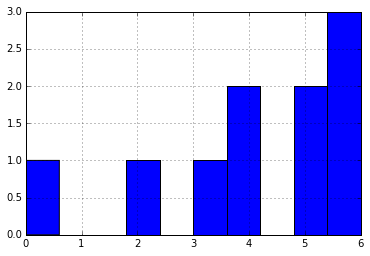

In [56]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))

df

0         1         2         3
0 -2.346373  0.105651 -0.048027  0.010637
1 -0.682198  0.943043  0.147312 -0.657871
2  0.515766 -0.768286  0.361570  1.146278
3 -0.607277 -0.003086 -1.499001  1.165728
4 -1.226279 -0.177246 -1.379631 -0.639261
5  0.807364 -1.855060  0.325968  1.898831
6  0.438539 -0.728131 -0.009924  0.398360
7  1.497457 -1.506314 -1.557624  0.869043
8  0.945985 -0.519435 -0.510359 -1.077751
9  1.597679 -0.285955 -1.060736  0.608629

可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [59]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

0         1         2         3
0 -2.346373  0.105651 -0.048027  0.010637
1 -0.682198  0.943043  0.147312 -0.657871
4 -1.226279 -0.177246 -1.379631 -0.639261
7  1.497457 -1.506314 -1.557624  0.869043
8  0.945985 -0.519435 -0.510359 -1.077751
9  1.597679 -0.285955 -1.060736  0.608629

### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print left
print right

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [61]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

### append

向 `DataFrame` 中添加行：

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

A         B         C         D
0  1.587778 -0.110297  0.602245  1.212597
1 -0.551109  0.337387 -0.220919  0.363332
2  1.207373 -0.128394  0.619937 -0.612694
3 -0.978282 -1.038170  0.048995 -0.788973
4  0.843893 -1.079021  0.092212  0.485422
5 -0.056594  1.831206  1.910864 -1.331739
6 -0.487106 -1.495367  0.853440  0.410854
7  1.830852 -0.014893  0.254025  0.197422

将第三行的值添加到最后：

In [63]:
s = df.iloc[3]

df.append(s, ignore_index=True)

A         B         C         D
0  1.587778 -0.110297  0.602245  1.212597
1 -0.551109  0.337387 -0.220919  0.363332
2  1.207373 -0.128394  0.619937 -0.612694
3 -0.978282 -1.038170  0.048995 -0.788973
4  0.843893 -1.079021  0.092212  0.485422
5 -0.056594  1.831206  1.910864 -1.331739
6 -0.487106 -1.495367  0.853440  0.410854
7  1.830852 -0.014893  0.254025  0.197422
8 -0.978282 -1.038170  0.048995 -0.788973

### Grouping

In [64]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

A      B         C         D
0  foo    one  0.773062  0.206503
1  bar    one  1.414609 -0.346719
2  foo    two  0.964174  0.706623
3  bar  three  0.182239 -1.516509
4  foo    two -0.096255  0.494177
5  bar    two -0.759471 -0.389213
6  foo    one -0.257519 -1.411693
7  foo  three -0.109368  0.241862

按照 `A` 的值进行分类：

In [65]:
df.groupby('A').sum()

C         D
A                      
bar  0.837377 -2.252441
foo  1.274094  0.237472

按照 `A, B` 的值进行分类：

In [66]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.414609 -0.346719
    three  0.182239 -1.516509
    two   -0.759471 -0.389213
foo one    0.515543 -1.205191
    three -0.109368  0.241862
    two    0.867919  1.200800

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [67]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one    -0.109174  0.958551
      two    -0.254743 -0.975924
baz   one    -0.132039 -0.119009
      two     0.587063 -0.819037
foo   one    -0.754123  0.430747
      two    -0.426544  0.389822
qux   one    -0.382501 -0.562910
      two    -0.529287  0.826337

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [68]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.109174
               B    0.958551
       two     A   -0.254743
               B   -0.975924
baz    one     A   -0.132039
               B   -0.119009
       two     A    0.587063
               B   -0.819037
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [69]:
stacked.unstack()

A         B
first second                    
bar   one    -0.109174  0.958551
      two    -0.254743 -0.975924
baz   one    -0.132039 -0.119009
      two     0.587063 -0.819037

也可以指定其他的级别：

In [70]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.109174 -0.254743
      B  0.958551 -0.975924
baz   A -0.132039  0.587063
      B -0.119009 -0.819037

## 时间序列

金融分析中常用到时间序列数据：

In [71]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    1.096788
2012-03-07    0.029678
2012-03-08    0.511461
2012-03-09   -0.332369
2012-03-10    1.720321
Freq: D, dtype: float64

标准时间表示：

In [72]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    1.096788
2012-03-07 00:00:00+00:00    0.029678
2012-03-08 00:00:00+00:00    0.511461
2012-03-09 00:00:00+00:00   -0.332369
2012-03-10 00:00:00+00:00    1.720321
Freq: D, dtype: float64

改变时区表示：

In [73]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.096788
2012-03-06 19:00:00-05:00    0.029678
2012-03-07 19:00:00-05:00    0.511461
2012-03-08 19:00:00-05:00   -0.332369
2012-03-09 19:00:00-05:00    1.720321
Freq: D, dtype: float64

## Categoricals

In [74]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

可以将 `grade` 变成类别：

In [75]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别的表示转化为有意义的字符：

In [76]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加缺失的类别：

In [77]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

使用 `grade` 分组：

In [78]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [79]:
plt.style.use('ggplot')

`Series` 绘图：

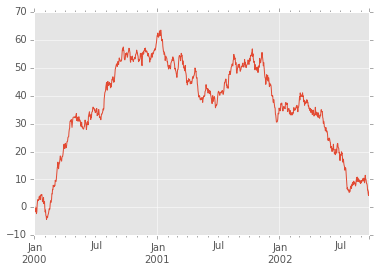

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

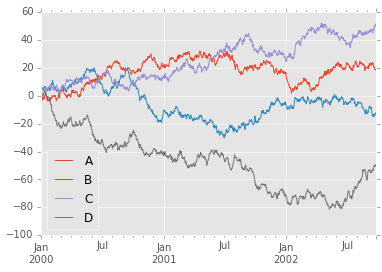

In [81]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## 文件读写

### csv

写入文件：

In [82]:
df.to_csv('foo.csv')

从文件中读取：

In [83]:
pd.read_csv('foo.csv').head()

Unnamed: 0         A         B         C         D
0  2000-01-01 -1.011554  1.200283 -0.310949 -1.060734
1  2000-01-02 -1.030894  0.660518 -0.214002 -0.422014
2  2000-01-03 -0.488692  1.709209 -0.602208  1.115456
3  2000-01-04 -0.440243  0.826692  0.321648 -0.351698
4  2000-01-05 -0.165684  1.297303  0.817233  0.174767

### hdf5

写入文件：

In [84]:
df.to_hdf("foo.h5", "df")

读取文件：

In [85]:
pd.read_hdf('foo.h5','df').head()

A         B         C         D
2000-01-01 -1.011554  1.200283 -0.310949 -1.060734
2000-01-02 -1.030894  0.660518 -0.214002 -0.422014
2000-01-03 -0.488692  1.709209 -0.602208  1.115456
2000-01-04 -0.440243  0.826692  0.321648 -0.351698
2000-01-05 -0.165684  1.297303  0.817233  0.174767

### excel

写入文件：

In [86]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取文件：

In [87]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

A         B         C         D
2000-01-01 -1.011554  1.200283 -0.310949 -1.060734
2000-01-02 -1.030894  0.660518 -0.214002 -0.422014
2000-01-03 -0.488692  1.709209 -0.602208  1.115456
2000-01-04 -0.440243  0.826692  0.321648 -0.351698
2000-01-05 -0.165684  1.297303  0.817233  0.174767

清理生成的临时文件：

In [88]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)